This notebook will consider the bounce task as mirroring the location with respect to the border. Input will be a coordinate out of bounds.

In [1]:
import pandas as pd
import numpy as np

# 1D

### Straight forward

In [2]:
df = pd.DataFrame(columns=["x","x_vel","y","y_vel"]) #,"x0","x1","y0","y1"])
def add(row, df):
    """Docstring"""
    d = dict()
    cols = list(df.columns)
    for i in np.arange(len(cols)):
        d[cols[i]] = row[i]
    return df.append(d, ignore_index=True)

def add_rnd(df):
    x_vel = np.sign(np.random.rand() - 0.5) * np.random.rand() * 0.1
    y_vel = np.sign(np.random.rand() - 0.5) * np.random.rand() * 0.1
    x = np.random.rand()
    y = np.random.rand()
    return add([x,x_vel,y,y_vel],df) #,0,1,0,1], df)

def add_next(df):
    x,x_vel,y,y_vel = list(df.iloc[-1])
    return add([x+x_vel,x_vel,y+y_vel,y_vel], df)

In [3]:
df = pd.DataFrame(columns=["x","x_vel","y","y_vel"]) #,"x0","x1","y0","y1"])
for i in range(100000):
    if i % 10 == 0: df = add_rnd(df)
    else: df = add_next(df)

In [4]:
df.to_csv('sim_data2.csv', index=False)

### Bounces (mirroring)
X-axis only

In [3]:
df = pd.DataFrame(columns=["x","x_vel","y","y_vel"])
for i in range(2000):
    border = np.random.choice([0,1]) #both walls
    x_vel = np.sign(border-0.5) * np.random.rand() * 0.1
    y_vel = np.random.rand() * 0.1
    x = np.random.uniform(low=border, high=border + x_vel)
    y = np.random.rand()
    df = add([x,x_vel,y,y_vel],df)
    df = add([2*border-x,-x_vel,y,y_vel],df)

df.to_csv('bounces_mirror.csv', index=False)

In [6]:
df.shape

(40000, 4)

In [5]:
df.head()

,x,x_vel,y,y_vel
0,1.065175,0.091181,0.143569,0.035583
1,0.934825,-0.091181,0.143569,0.035583
2,-0.009694,-0.016846,0.560207,0.045548
3,0.009694,0.016846,0.560207,0.045548
4,1.009336,0.095540,0.969735,0.082275


### Attention

Is there going to be a bounce? Bool

In [7]:
df = pd.DataFrame(columns=["x","x_vel","is_bounce"])
for i in range(20000):
    border = np.random.choice([0,1]) #both walls
    x_vel = np.sign(border-0.5) * np.random.rand() * 0.1
    y_vel = np.random.rand() * 0.1
    x = np.random.uniform(low=border, high= border + np.random.choice([-1,1]) *x_vel)
    y = np.random.rand()
    boolean = (x > 1) or (x < 0)
    df = add([x,x_vel,boolean],df)

df.to_csv('bounces_att.csv', index=False)

In [24]:
df.head()

,x,x_vel,is_bounce
0,0.003005,-0.047897,False
1,-0.034068,-0.057702,True
2,-0.004273,-0.043802,True
3,0.015567,-0.026639,False
4,0.024705,-0.026929,False


In [22]:
np.mean(df.is_bounce)

0.51

# 2D

In [6]:
def add_check_borders(c, c_vel):
    c2, c_vel2 = c + c_vel, c_vel
    if c2 > 1:
        c2 = 1 - np.abs(1-c2)
        c_vel2 = -c_vel
    elif c2 < 0:
        c2 = np.abs(c2)
        c_vel2 = -c_vel
    return c2, c_vel2

def add_borders_next(df):
    x,x_vel,y,y_vel = list(df.iloc[-1])
    x2, xv2 = add_check_borders(x, x_vel)
    y2, yv2 = add_check_borders(y, y_vel)
    return add([x2,xv2,y2,yv2], df)

In [6]:
df = pd.DataFrame(columns=["x","x_vel","y","y_vel"])
for i in range(2000):
    if i % 2 == 0:
        x_vel = np.random.rand() * 0.1 #* np.sign(np.random.rand()-0.5) * 0.1
        y_vel = np.random.rand() * np.sign(np.random.rand()-0.5) * 0.1
        if np.random.rand() >0.5:
            x = np.random.uniform(low=0, high=np.abs(x_vel))
            y = np.random.rand()
            if np.sign(x_vel) > 0: x = 1 - x
        else:
            y = np.random.uniform(low=0, high=np.abs(y_vel))
            x = np.random.rand()
            if np.sign(y_vel) > 0: y = 1 - y
#         df = add([x,x_vel,y,y_vel],df)
        for i in range(3, -1, -1):
            df = add([x-i*x_vel,x_vel,y-i*y_vel,y_vel],df)
    else: 
        df = add_borders_next(df)
df.to_csv('bounces_2d.csv', index=False)

KeyboardInterrupt: 

In [9]:
df[:11]

,x,x_vel,y,y_vel
0,0.120094,0.069925,0.945862,0.017939
1,0.190019,0.069925,0.963801,0.017939
2,0.259944,0.069925,0.981741,0.017939
3,0.329869,0.069925,0.999680,0.017939
4,0.399794,0.069925,0.982380,-0.017939
5,0.430128,0.085694,0.991200,0.002431
6,0.515822,0.085694,0.993632,0.002431
7,0.601516,0.085694,0.996063,0.002431
8,0.687210,0.085694,0.998494,0.002431
9,0.772905,0.085694,0.999074,-0.002431


## Two ball bounce

Assume radii=0.05 for all. Same mass.

In [5]:
df = pd.DataFrame(d, columns=["x1","x1_vel","y1","y1_vel","x2","x2_vel","y2","y2_vel"])

NameError: name 'd' is not defined

In [6]:
df.to_csv('data/2ball_bounce.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
def get_new_vels(x_dist, y_dist, x_vel, y_vel, x2_vel, y2_vel):
    tan = y_dist/x_dist
    alpha = np.arctan(tan)
    beta = y_vel/x_vel
    gamma = alpha - beta
    lenu = np.sqrt(x_vel**2 + y_vel**2)
    lenv = np.sqrt(x2_vel**2 + y2_vel**2)

    X = np.sqrt((np.cos(gamma)**2 * lenu)/(1+np.tan(alpha)**2))
    A = np.sqrt((np.cos(gamma)**2 * lenv)/(1+np.tan(alpha)**2))

    x_vel = X - A
    y_vel = -1/np.tan(alpha) * X - np.tan(alpha) * A

    x2_vel = -A+X
    y2_vel = 1/np.tan(alpha) * A + np.tan(alpha) * X
    return x_vel, y_vel, x2_vel, y2_vel

In [6]:
d = []
for _ in range(2000):
    x, y = np.random.uniform(size=2)
    x_dist = np.random.uniform(0, 0.1) #2radius is max dist
    y_dist = np.sqrt(0.1**2 - x_dist**2)
    x2, y2 = x+x_dist, y+y_dist 

    x_vel,y_vel = np.random.uniform(0,0.1,size=2)
    x2_vel,y2_vel = np.random.uniform(0,-0.1,size=2)
    d += [[x, x_vel, y, y_vel, x2, x2_vel, y2, y2_vel]]
    
    x_vel, y_vel, x2_vel, y2_vel = get_new_vels(x_dist, y_dist, x_vel, y_vel, x2_vel, y2_vel)
    d += [[x, x_vel, y, y_vel, x2, x2_vel, y2, y2_vel]]
    

In [7]:
def R(gamma):
    """
    Returns rotation matrix to rotate a vector by gamma radians
    in counter-clockwise direction.
    """
    return np.array([
        [np.cos(gamma), -np.sin(gamma)],
        [np.sin(gamma), np.cos(gamma)]
    ])

In [20]:
#moment of collision
x, y = np.random.uniform(0.15,0.85,size=2)
x_dist = np.random.uniform(-0.1, 0.1) #2radius is max dist
y_dist = np.random.choice([-1,1]) * np.sqrt(0.1**2 - x_dist**2)
x2, y2 = x+x_dist, y+y_dist 

theta = np.random.uniform(-np.pi/2, np.pi/2)
n = np.array([x_dist,y_dist])
v = np.matmul(R(theta), n)
v2 = [0,0]

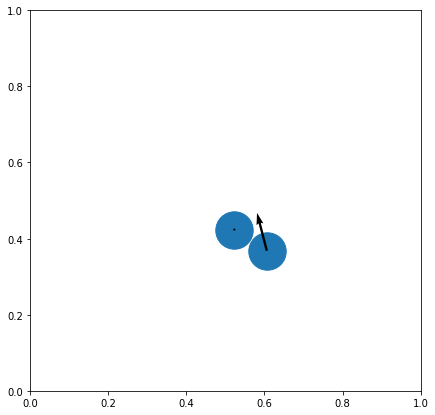

In [21]:
plt.figure(figsize=(7,7))
plt.axes(xlim=[0,1],ylim=[0,1])
plt.scatter([x,x2],[y,y2], s=1400)

plt.quiver(x, y, v[0], v[1], width=0.006, scale=1)
plt.quiver(x2, y2, v2[0],v2[1], width=0.006, scale=1)
# plt.quiver(x,y,n[0],n[1],color='r')


In [22]:
tan = y_dist/x_dist
alpha = np.arctan(n[1]/n[0])
beta = np.arctan(v[1]/v[0])
gamma = alpha - beta
u = np.cos(gamma) * np.matmul(R(gamma),v)
p = np.sin(gamma) * np.matmul(R(gamma-np.pi/2),v)


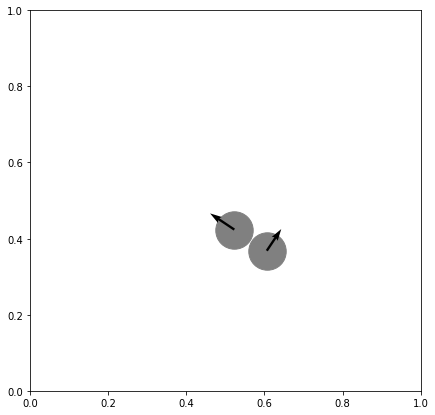

In [25]:
plt.figure(figsize=(7,7))
plt.axes(xlim=[0,1],ylim=[0,1])
plt.scatter([x,x2],[y,y2], s=1400, c='grey')
plt.quiver(x, y, p[0], p[1], width=0.006, scale=1)
plt.quiver(x2, y2, u[0], u[1], width=0.006, scale=1)